<a href="https://colab.research.google.com/github/Data-Analytics-with-Python/individual-assignment-i-djords1/blob/main/Assignment_Notebook_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTANT: Before you start, enter your name and student number below.

**Full Name:** Sofia Djordjevic

**Student Number:** 400310764

# Exploring Customer Data with Pandas

Use the provided Nata Supermarkets dataset to answer the following questions.
Your goal is to use Pandas operations to explore, clean, and summarize the data, and to draw a few simple insights about customer demographics and behavior.

Please complete all task requested and answer all questions explicitly and support your answers with Python codes. Insert code and text cells as you need.

## 1. Inspecting and loading the Data (10pts)

* Save the dataset in the case supplementary file (in Excel) as a csv file and save it in a public GitHub repository.

* Load the dataset as a pandas data frame and display the first few rows.

    * How many features (columns) and records (rows) are in the dataset?

In [16]:
import pandas as pd
df_customers = pd.read_csv('/content/customer_dataset.csv')
print(str(df_customers.shape[0]) + " rows.\n" + str(df_customers.shape[1]) + " columns.")
df_customers.head(10)

2240 rows.
29 columns.


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,2013-09-09,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,2013-08-05,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,2013-06-06,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,...,20,1,0,0,0,0,0,3,11,0


## 2. Data Cleaning and Missing Values (14pts)

* Check for missing values across all columns.

* Which columns contain missing data, and how many missing entries are there?

* What strategies could you use to handle them (drop, fill, or ignore)? Apply one reasonable approach and explain your choice.

In [17]:
df_customers.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [14]:
median_income = df_customers['Income'].median()
df_customers['Income'] = df_customers['Income'].fillna(median_income)

The column that contains missing data is the "Income" column, and it has 24 missing entries.

Strategies to handle missing data include:

Dropping rows or columns: If the number of missing values is small relative to the dataset size or if the entire row/column is not crucial, you can drop them.

Filling: Replacing missing values with estimated values.

Ignoring missing values: Some models and analyses can handle missing values directly.

For the 'Income' column with 24 missing entries out of 2240, dropping these rows would remove a small percentage of the data (less than 2%). Given that 'Income' is likely an important feature for customer analysis, filling the missing values might be a better approach than dropping. A reasonable strategy here is to fill the missing income values with the median income, as income distributions can be skewed and the median is less affected by outliers than the mean.

## 3. Removing Constant Columns (14pts)

* Identify any columns with constant values (no variance; all rows have the same value).

* Drop them from your DataFrame and confirm how many columns remain.

In [18]:
columns_to_drop = []
print("These features have no variance and should be dropped:")
for col in df_customers.columns:
  unique_values = df_customers[col].nunique()
  if unique_values == 1:
    print(col)
    columns_to_drop.append(col)

df_customers = df_customers.drop(columns=columns_to_drop)
print('\n' + str(df_customers.shape[1]) + ' columns remain in the DataFrame')

These features have no variance and should be dropped:
Z_CostContact
Z_Revenue

27 columns remain in the DataFrame


## 4. Add a new column (15pts)

* Add a new column **Customer_Days** to store the total number of days each customer has been with the company. You may follow the steps below:
  * use `pd.to_datetime(df["Dt_Customer"])` to convert the string variable to a *date-time* variable

  * use `today = datetime.today()` to find the date of today

  * use `(today - df["Dt_Customer"]).dt.days` to find the difference between today and the onbard date.

In [19]:
from datetime import datetime
df_customers["Dt_Customer"] = pd.to_datetime(df_customers["Dt_Customer"], format='mixed')
today = datetime.today()
df_customers['Customer_Days'] = (today - df_customers["Dt_Customer"]).dt.days

In [20]:
df_customers['Customer_Days']

,Customer_Days
0,4943
1,4097
2,4444
3,4037
4,4293
...,...
2235,4513
2236,4033
2237,4287
2238,4288


## 5. Categorical Features (15 pts)

* For `Education` and `Marital_Status`,

  * find how many customers fall into each category
  * create pie charts to show the percentage of each category; make sure to show the percentage numbers on the chart with 2 decimal places

* What do you findings suggest about the company's target demographic?

In [7]:
education_counts = df_customers['Education'].value_counts()
print("Customer counts by Education level:")
print(education_counts)

Customer counts by Education level:
Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64


In [8]:
marital_status_counts = df_customers['Marital_Status'].value_counts()
print("\nCustomer counts by Marital Status:")
print(marital_status_counts)


Customer counts by Marital Status:
Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64


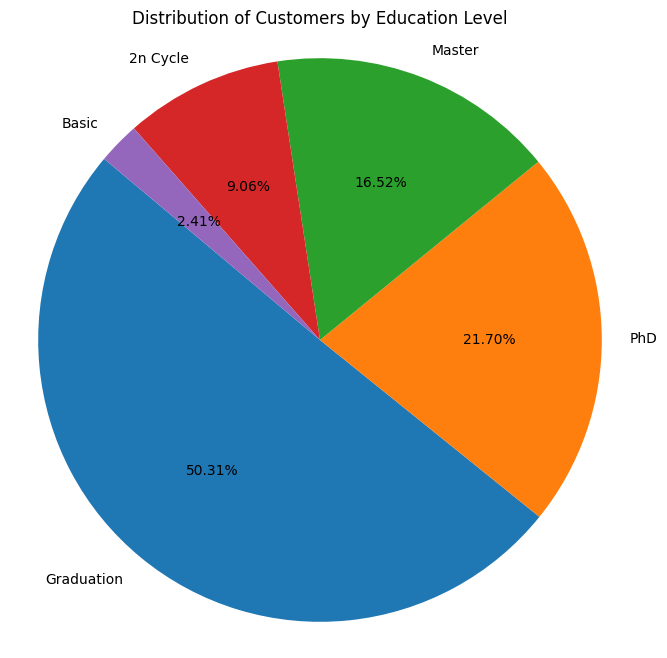

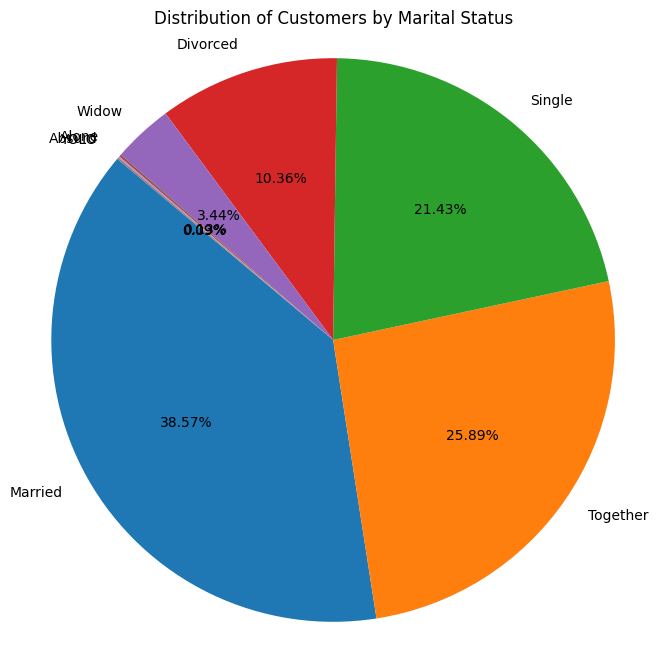

In [9]:
import matplotlib.pyplot as plt

# Pie chart for Education
plt.figure(figsize=(8, 8))
plt.pie(education_counts, labels=education_counts.index, autopct='%1.2f%%', startangle=140)
plt.title('Distribution of Customers by Education Level')
plt.axis('equal')
plt.show()

# Pie chart for Marital Status
plt.figure(figsize=(8, 8))
plt.pie(marital_status_counts, labels=marital_status_counts.index, autopct='%1.2f%%', startangle=140)
plt.title('Distribution of Customers by Marital Status')
plt.axis('equal')
plt.show()

Education: The largest group of customers has a Graduation degree, followed by PhD and Master degrees.

Marital Status: The majority of customers are either Married or Together, indicating the target is people in committed relationships. There is also a large number of Single and Divorced customers.

Based on the customer counts and pie charts for Education and Marital Status, we can assume that Nata Supermarkets appears to primarily target highly educated individuals who have graduated some sort of school, with a strong presence of customers who are married or together.

## 6. Numeric Variables (15pts)

* For `Income`, `Kidhome`, and `Teenhome`,
  * use boxplots to visualize their distributions.

* Based on these distributions, what can you say about the typical household profile of Nata's customers?

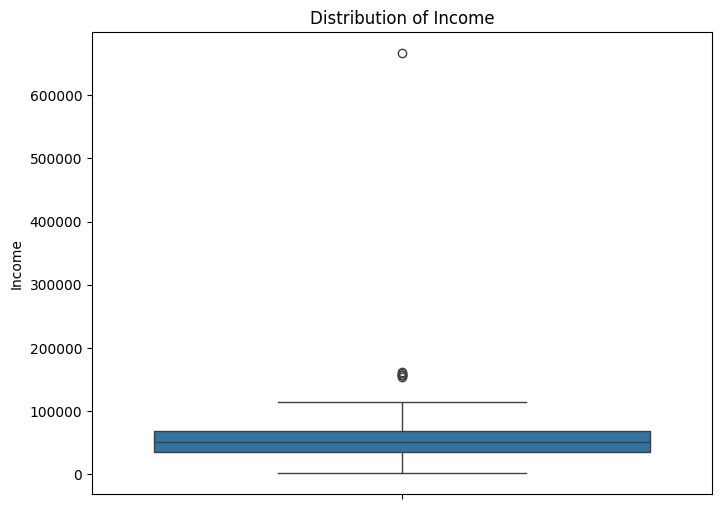

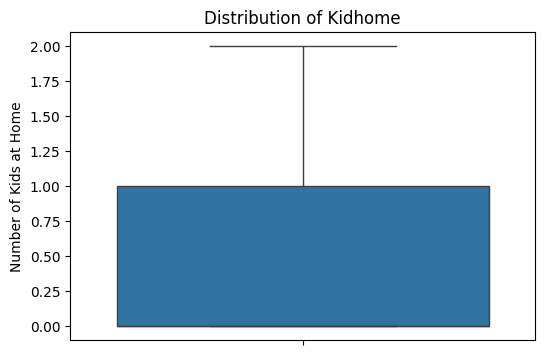

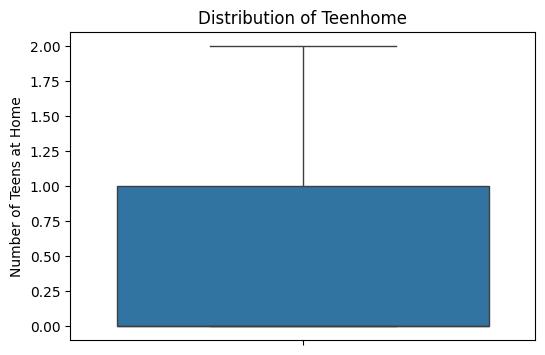

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot for Income
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_customers['Income'])
plt.title('Distribution of Income')
plt.ylabel('Income')
plt.show()

# Boxplot for Kidhome
plt.figure(figsize=(6, 4))
sns.boxplot(y=df_customers['Kidhome'])
plt.title('Distribution of Kidhome')
plt.ylabel('Number of Kids at Home')
plt.show()

# Boxplot for Teenhome
plt.figure(figsize=(6, 4))
sns.boxplot(y=df_customers['Teenhome'])
plt.title('Distribution of Teenhome')
plt.ylabel('Number of Teens at Home')
plt.show()

Income: The boxplot for Income shows a wide range of incomes, with the median income appearing in the moderate to high range. There are also some outliers with higher incomes. This suggests that Nata Supermarkets mostly caters to customers who have higher earning potential.

Kidhome: The boxplot for Kidhome indicates that a large number of customers have no children at home, with some customers who have one child. This suggests that households with young children are less prevalent among Nata's customers compared to those without.

Teenhome: Similiar to Kidhome, the boxplot for Teenhome shows that many customers have no teenagers at home, with some customers who have one child. This suggests that households with teenagers are also present, but households without teenagers are more common.

Based on the boxplots for Income, Kidhome, and Teenhome, we can see that the typical household profile appears to be one with moderate to high income, and more likely to have no young children at home. Households with teenagers are also represented, but less so than those without young children.

## 7. Spending by Products (15pts)

* Examine the spending amount columns `MntWines`,	`MntFruits`,	`MntMeatProducts`,	`MntFishProducts`,	`MntSweetProducts`,	`MntGoldProds`, and find the product with the highest total spending amount by all customers.



In [11]:
spending_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
total_spending = df_customers[spending_columns].sum()

highest_spending_product = total_spending.idxmax()
highest_spending_amount = total_spending.max()

print("Total spending by product category:")
print(total_spending)
print(f"\nProduct with the highest total spending: {highest_spending_product}")
print(f"Highest total spending amount: {highest_spending_amount:.2f}")

Total spending by product category:
MntWines            680816
MntFruits            58917
MntMeatProducts     373968
MntFishProducts      84057
MntSweetProducts     60621
MntGoldProds         98609
dtype: int64

Product with the highest total spending: MntWines
Highest total spending amount: 680816.00


## 8. Use of Gen. AI (2pts)

Use of Generative AI is allowed. Briefly describe if and how you have used Gen. AI tools in this assignment.

I have used Generative AI as a collaborative tool to assist with the tasks in this assignment. I have interpreted the instructions provided in the markdown cells, generated Python code to perform data loading, cleaning, analysis, and visualization, and provided explanations and interpretations of the results based on the data. I have also responded to requests for specific actions, such as creating plots or performing calculations.